# Lab 3

## The main question

The datasets chosen for this laboratory project concern activated and terminated employment contracts in Lombardy. 
The goal is to get a prevision on the number of activated and terminated contracts based on parameters such date, educational qualification and geographical area. In this way it is possible to get an overwiew about the labour market based on the input data.

## Imports

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

## Datasets Analysis

The considered datasets are available on the Lombardy Region website at the following links:

[__Activated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-attivati/qbau-cyuc)

[__Terminated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-cessati/nwz3-p6vm)

### Datasets overview

In [2]:
# Loading and showing the first dataset
activated_work = pd.read_csv("Rapporti_di_lavoro_attivati.csv")
# Loading and showing the second dataset
terminated_work = pd.read_csv("Rapporti_di_lavoro_cessati.csv")

In [3]:
activated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)
terminated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)
activated_work['TIPOLOGIA'] = 'ATTIVATO'
terminated_work['TIPOLOGIA'] = 'TERMINATO'
total = [activated_work, terminated_work]
result = pd.concat(total)
result_df = pd.DataFrame(result) #check if redundant
newDF = result_df[['DATA', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'TIPOLOGIA']]
tempDF = newDF.copy()
tempDF['DATA'] = pd.to_datetime(tempDF['DATA'], errors = 'coerce', format='%d/%m/%Y')
tempDF['YEAR']= tempDF['DATA'].dt.year
tempDF['MONTH']= tempDF['DATA'].dt.month
newDF = tempDF[['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'TIPOLOGIA']].copy()
newDF = newDF.dropna()

In [4]:
enc = preprocessing.OrdinalEncoder()
enc.fit(newDF[['TITOLOSTUDIO','PROVINCIAIMPRESA', 'TIPOLOGIA']])
newDF[['TITOLOSTUDIO','PROVINCIAIMPRESA', 'TIPOLOGIA']] = enc.transform(newDF[['TITOLOSTUDIO','PROVINCIAIMPRESA', 'TIPOLOGIA']])

## Model

In [5]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
## Model
DFCompleted = newDF.groupby(['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'TIPOLOGIA']).size().reset_index(name='SUM')

DFCompleted['TEST'] = DFCompleted['TIPOLOGIA']  * DFCompleted['SUM']

DFCompleted.head()

asdasdasd = DFCompleted[['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'SUM', 'TEST']]

asdasdasd = asdasdasd.groupby(['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA']).sum().reset_index()

asdasdasd.describe()

asdasdasd['TEST'] = asdasdasd['TEST']  / asdasdasd['SUM']

asdasdasd.describe()

#Creating the features dataset and the temperature dataset
training = asdasdasd[['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA']]
results = asdasdasd['TEST']

#Creating training and validation dataset
train_X, val_X, train_y, val_y = train_test_split(training, results, random_state = 0)



regressor = RandomForestRegressor(max_depth=2, random_state=0)

regressor.fit(train_X, train_y)

pred_y = regressor.predict(val_X)

print("MSE: "+str(mean_squared_error(val_y, pred_y)))

MSE: 0.04147139847380138


In [7]:
def plotDataForYear(year, studyTitle, location):
    lst = []

    for month in range(1, 13):
        predictedValue = regressor.predict([[year, month, studyTitle, location]])
        lst.append([month, predictedValue[0]])

    df = pd.DataFrame(lst, columns = ['Month', 'Result'])
    print(df)
    ax = sb.lineplot(x = "Month", y = "Result", data = df);
    ax.set_title("Contracts in "+str(year)+ " for ", fontsize = 20)
    plt.show()

    Month    Result
0       1  0.378603
1       2  0.378603
2       3  0.378603
3       4  0.377231
4       5  0.253414
5       6  0.253414
6       7  0.253414
7       8  0.253414
8       9  0.253414
9      10  0.253414
10     11  0.253414
11     12  0.253414


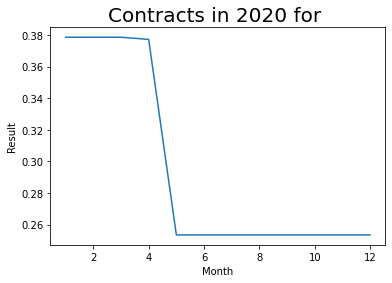

In [8]:
plotDataForYear(2020, 8, 8)

    Month    Result
0       1  0.851387
1       2  0.851387
2       3  0.851387
3       4  0.851387
4       5  0.851387
5       6  0.851387
6       7  0.851387
7       8  0.851387
8       9  0.851387
9      10  0.851387
10     11  0.851387
11     12  0.851387


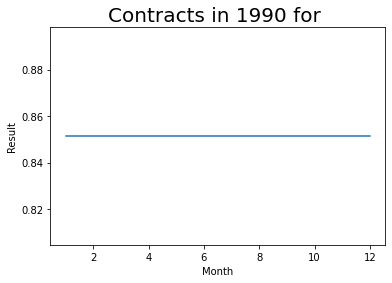

In [9]:
plotDataForYear(1990, 8, 8)